In [4]:
from _util import *
import _analyzer as analyzer
reload(analyzer)
from matplotlib.transforms import BlendedGenericTransform
import matplotlib.gridspec as gridspec

# import shutil
# shutil.rmtree("res/0316") /
# shutil.rmtree("fig/0327") 
# !tar -czf fig.tar.gz fig/0429/_N50_T100_K5_p10_sigma2

# 1std = .8413 -> 68
# 0.5 std = .6915 -> 38
# 0.25 std = .5987 -> 19.74

# a = load(path)
# n_reps = sum(a['record']['data_plot_BR_original']['time'] == a['record']['data_plot_BR_original']['time'].max()) / 4
# print('n_reps = {}'.format(int(n_reps)))

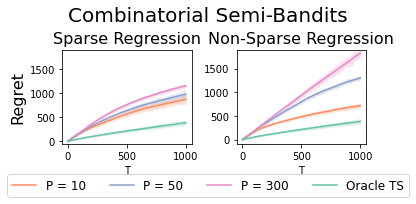

In [139]:
reload(analyzer)
fig, axs = plt.subplots(1, 2)
plt.rcParams["figure.figsize"] = [8, 2]
plt.tight_layout()
# fig.suptitle(title, size = 30) 
fig.subplots_adjust(top=0.85)
titles = ['Sparse Regression', 'Non-Sparse Regression']
y_max = [1900,1900]
L = 500
p = 300
main_path = 'L500_T1000_K5_p300_spike_slab{}'
varing_params = [True, False]
for i in range(2):
    path = main_path.format(varing_params[i])
    #phi_beta
    if i == 0:
        ylabel = 'Regret'
    else:
        ylabel = None
    handles, labels = analyzer.load_and_plot_ax(path, ax = axs[i], target = 'BR'
                  , plot_mean = 0, title = titles[i]
                  , skip_methods = None, freq = 1
                  , skip = 0, ylabel = ylabel, ylabel_size = 16, title_size = 16
                  , ci = 38 #None. approximately 68% of data is within +/- 1 standard deviation from the mean; 'sd' = std instead of std of the mean
                  , names = ["Oracle TS", "P = 10", "P = 50", "P = 300"]
                  , y_min = None, y_max = y_max[i])

#labels[labels.index("Meta TS (Ours)")] = "MTSS"
fig.legend(handles, labels, loc='lower center', ncol = len(labels), fontsize = 12
# #             , bbox_to_anchor = [1.2, -0.6] # location # 0.4 for my plot
          , bbox_to_anchor = [0.5, -0.62]
         , bbox_transform = BlendedGenericTransform(fig.transFigure, axs[1].transAxes)
                )
fig.suptitle('Combinatorial Semi-Bandits', y = 1.15, size = 20)
fig.show()
###########
fig.savefig("Final_Sparse_Semi_L_{}_p_{}_sparse".format(L, p) + ".pdf"
                   , bbox_inches= "tight", dpi = 200, format = 'pdf')

In [30]:
main_path = 'L500_T1000_K5_p300_spike_slab{}'
out = []
varing_params = [True, False]
summary_table = dict()
for i in range(2):   
    path = main_path.format(varing_params[i])
    a = load(path)
    data_plot_BR = a['record']['data_plot_BR_original'].copy()
    #data_plot_BR.regret = data_plot_BR.regret / (data_plot_BR.time + 1)
    #data_plot_BR = data_plot_BR[data_plot_BR.time % 100 == 0]
    
    summary = []
    for method in ['P = 10', 'P = 50', 'P = 300', 'Oracle TS']:
        out = []
        total = data_plot_BR[(data_plot_BR.method==method) & (data_plot_BR.time==999)].regret
        out.append(total)
        summary.append(pd.Series({'method':method, 'mean':np.mean(out), 'SD':np.std(out)/10}))
    
    summary_table[varing_params[i]] = pd.DataFrame(summary)

In [32]:
summary_table[True].round(2)

,method,mean,SD
0,P = 10,868.40,26.96
1,P = 50,973.82,24.89
2,P = 300,1151.60,13.92
3,Oracle TS,384.69,15.56


In [169]:
summary_table[False].round(2)

,method,mean,SD
0,P = 10,717.87,16.04
1,P = 50,1301.25,14.81
2,P = 300,1825.38,35.79
3,Oracle TS,384.69,15.56
